Проект по анализу текстовой переписки по эмоциональной окраске и представлению в виде одного цвета основан на анализе содержания сообщений с целью выявления эмоциональной тональности. В процессе работы над проектом используются методы обработки естественного языка (Natural Language Processing, NLP), анализа тональности и преобразования текста в числовые представления, которые затем связываются с цветовым представлением.

Основные этапы проекта включают:

1. Предобработка текста: Очистка и токенизация текстов для подготовки к анализу.

2. Анализ тональности: Использование алгоритмов машинного обучения или лексических методов для определения эмоциональной окраски текста (позитивная, негативная, нейтральная).

3. Привязка к цвету: Преобразование результатов анализа тональности в числовое представление цвета. Это может быть осуществлено с использованием цветовых моделей (RGB), где различные эмоциональные состояния ассоциируются с определенными диапазонами значений компонент цвета.

Визуализация: Представление каждого сообщения или документа в виде одного цвета на основе его эмоциональной окраски. Это реализовано с помощью графических библиотек Python (Matplotlib).

Целью проекта является визуализация эмоциональной динамики текстовой переписки, что может быть полезно для анализа и восприятия эмоциональной составляющей больших объемов текстовых данных, например, в социальных сетях, клиентских отзывах или чат-ботах.

In [1]:
import pandas as pd

In [2]:
#Загрузить файл Manual_transcription clear with label.csv с помощью DataFrame
from google.colab import files
uploaded = files.upload()

Saving Manual_transcription clear with label.csv to Manual_transcription clear with label.csv


In [4]:
db = pd.read_csv('Manual_transcription clear with label.csv', sep = ';')

In [5]:
db.head(10)

,Name_audio,Transcription,label
0,10dec_D11_1_p1,Давай ты успокоишься для начала. Ты можешь не ...,гнев
1,10dec_D11_1_p2,"Подожди, подожди, успокойся пожалуйста. Подожд...",гнев
2,10dec_D11_2_p1,"Кристин, привет. Ты слышала там самолёт упал в...",страх
3,10dec_D11_2_p2,"Кристин, привет .. слушай .. Я боюсь лететь, т...",страх
4,10dec_D31_1,"Почему? Подожди... Ну подожди, ну как же, но м...",грусть
5,10dec_D31_2,Крис я не смогу поехать в Новую Зеландию. У ме...,грусть
6,10dec_D41_1,Ну... Ну я забыла. Ну-ну. Ну у меня экзамены б...,грусть
7,10dec_D41_2,"Я тебя просто попросил купить билеты, понимаеш...",гнев
8,10dec_D42_1,"Ну прости пожалуйста, но я забыла. Ну у меня с...",грусть
9,10dec_D42_2,"Слушай, я просто попросил тебя купить билеты н...",гнев


In [6]:
#Удалить колонку Name_audio.
df1 = db.drop(columns = 'Name_audio')
df1.head(10)

,Transcription,label
0,Давай ты успокоишься для начала. Ты можешь не ...,гнев
1,"Подожди, подожди, успокойся пожалуйста. Подожд...",гнев
2,"Кристин, привет. Ты слышала там самолёт упал в...",страх
3,"Кристин, привет .. слушай .. Я боюсь лететь, т...",страх
4,"Почему? Подожди... Ну подожди, ну как же, но м...",грусть
5,Крис я не смогу поехать в Новую Зеландию. У ме...,грусть
6,Ну... Ну я забыла. Ну-ну. Ну у меня экзамены б...,грусть
7,"Я тебя просто попросил купить билеты, понимаеш...",гнев
8,"Ну прости пожалуйста, но я забыла. Ну у меня с...",грусть
9,"Слушай, я просто попросил тебя купить билеты н...",гнев


In [7]:
#*Переименовать колонку 'label' в 'Emotion'
df1 = df1.rename(columns = {'label':'Emotion'})
df1.head(10)

,Transcription,Emotion
0,Давай ты успокоишься для начала. Ты можешь не ...,гнев
1,"Подожди, подожди, успокойся пожалуйста. Подожд...",гнев
2,"Кристин, привет. Ты слышала там самолёт упал в...",страх
3,"Кристин, привет .. слушай .. Я боюсь лететь, т...",страх
4,"Почему? Подожди... Ну подожди, ну как же, но м...",грусть
5,Крис я не смогу поехать в Новую Зеландию. У ме...,грусть
6,Ну... Ну я забыла. Ну-ну. Ну у меня экзамены б...,грусть
7,"Я тебя просто попросил купить билеты, понимаеш...",гнев
8,"Ну прости пожалуйста, но я забыла. Ну у меня с...",грусть
9,"Слушай, я просто попросил тебя купить билеты н...",гнев


In [8]:
#Добавить колонку 'Sentiment'.
df1['Sentiments'] = 0
df1.head(10)

,Transcription,Emotion,Sentiments
0,Давай ты успокоишься для начала. Ты можешь не ...,гнев,0
1,"Подожди, подожди, успокойся пожалуйста. Подожд...",гнев,0
2,"Кристин, привет. Ты слышала там самолёт упал в...",страх,0
3,"Кристин, привет .. слушай .. Я боюсь лететь, т...",страх,0
4,"Почему? Подожди... Ну подожди, ну как же, но м...",грусть,0
5,Крис я не смогу поехать в Новую Зеландию. У ме...,грусть,0
6,Ну... Ну я забыла. Ну-ну. Ну у меня экзамены б...,грусть,0
7,"Я тебя просто попросил купить билеты, понимаеш...",гнев,0
8,"Ну прости пожалуйста, но я забыла. Ну у меня с...",грусть,0
9,"Слушай, я просто попросил тебя купить билеты н...",гнев,0


In [9]:
#Заполниь колонку сентимент по принципу эмоции гнев, грусть, отвращение, страх - негативный сентимент; радость, удивление - позитивный сентимент, нейтраль -* нейтральное состояние*
import numpy as np


In [10]:
def sentiment(emotion):
  if emotion in ['гнев', 'грусть', 'отвращение', 'страх']:
    return 'негативный'
  elif emotion in ['радость']:
    return 'позитивный'
  else:
    return 'нейтральный'

In [11]:
df1['Sentiments'] = df1['Emotion'].apply(sentiment)
df1.head(10)

,Transcription,Emotion,Sentiments
0,Давай ты успокоишься для начала. Ты можешь не ...,гнев,негативный
1,"Подожди, подожди, успокойся пожалуйста. Подожд...",гнев,негативный
2,"Кристин, привет. Ты слышала там самолёт упал в...",страх,негативный
3,"Кристин, привет .. слушай .. Я боюсь лететь, т...",страх,негативный
4,"Почему? Подожди... Ну подожди, ну как же, но м...",грусть,негативный
5,Крис я не смогу поехать в Новую Зеландию. У ме...,грусть,негативный
6,Ну... Ну я забыла. Ну-ну. Ну у меня экзамены б...,грусть,негативный
7,"Я тебя просто попросил купить билеты, понимаеш...",гнев,негативный
8,"Ну прости пожалуйста, но я забыла. Ну у меня с...",грусть,негативный
9,"Слушай, я просто попросил тебя купить билеты н...",гнев,негативный


In [12]:
#Проверить все ли хорошо преобразовалось
df1['Sentiments'].unique()

array(['негативный', 'позитивный', 'нейтральный'], dtype=object)

In [13]:
# Преобразовать эмоции в цифры. (от 0 до кол-ва эмоций). Записать в отдельную колонку 'Emotion digits'
def zifry(emotion):
  if emotion in 'гнев':
    return 0
  elif emotion in 'грусть':
    return 3
  elif emotion in 'отвращение':
    return 2
  elif emotion in 'страх':
    return 1
  elif emotion in 'радость':
    return 5
  elif emotion in 'удивление':
    return 4
  else:
    return 6

In [14]:
df1['Emotion digits'] = df1['Emotion'].apply(zifry)
df1.head(10)

,Transcription,Emotion,Sentiments,Emotion digits
0,Давай ты успокоишься для начала. Ты можешь не ...,гнев,негативный,0
1,"Подожди, подожди, успокойся пожалуйста. Подожд...",гнев,негативный,0
2,"Кристин, привет. Ты слышала там самолёт упал в...",страх,негативный,1
3,"Кристин, привет .. слушай .. Я боюсь лететь, т...",страх,негативный,1
4,"Почему? Подожди... Ну подожди, ну как же, но м...",грусть,негативный,3
5,Крис я не смогу поехать в Новую Зеландию. У ме...,грусть,негативный,3
6,Ну... Ну я забыла. Ну-ну. Ну у меня экзамены б...,грусть,негативный,3
7,"Я тебя просто попросил купить билеты, понимаеш...",гнев,негативный,0
8,"Ну прости пожалуйста, но я забыла. Ну у меня с...",грусть,негативный,3
9,"Слушай, я просто попросил тебя купить билеты н...",гнев,негативный,0


In [15]:
df1['Emotion digits'].unique()

array([0, 1, 3, 2, 5, 4, 6])

In [16]:
#Преобразовать сентимент в цифры. (от 0 до кол-ва сентиментов). Записать в отдельную колонку 'Sentiment digits'
codes, g = pd.factorize(df1['Sentiments'], sort=True)
g


Index(['негативный', 'нейтральный', 'позитивный'], dtype='object')

In [17]:
df1['Sentiment digits'] = codes
df1.sample(10)

,Transcription,Emotion,Sentiments,Emotion digits,Sentiment digits
14,"Фу! Да фу, ну он же склизский!",отвращение,негативный,2,0
416,"Родион Владимирович, Саша мне тут рассказывает...",радость,позитивный,5,2
6,Ну... Ну я забыла. Ну-ну. Ну у меня экзамены б...,грусть,негативный,3,0
339,"Меня зовут Катя, фамилия моя Кашина, я родилас...",нейтраль,нейтральный,6,1
460,"Фу. Фу, все все все. Кать это… Перестань все…",отвращение,негативный,2,0
455,"В смысле не успел? Я надеюсь ты сейчас шутишь,...",гнев,негативный,0,0
10,Ну ты можешь не кричать на меня хотя бы? Ну я ...,грусть,негативный,3,0
337,Правила игры дурак подкидной. Ведущий или один...,нейтраль,нейтральный,6,1
328,"Вот он мне позвонил и сказал, что я новый дире...",радость,позитивный,5,2
3,"Кристин, привет .. слушай .. Я боюсь лететь, т...",страх,негативный,1,0


In [18]:
df1['Sentiment digits'].mean()

0.508411214953271

In [21]:
to_plot = pd.DataFrame(df1['Sentiment digits'].value_counts())
to_plot

,count
Sentiment digits,
0,333
1,132
2,70


In [22]:
to_plot.columns = ['Amount']
to_plot = to_plot.sort_index()
to_plot

,Amount
Sentiment digits,
0,333
1,132
2,70


In [23]:
import matplotlib.pyplot as plt

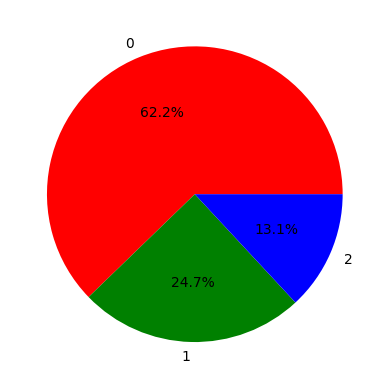

In [40]:
plt.pie(to_plot['Amount'], labels = to_plot.index, autopct='%1.1f%%', colors=['red', 'green', 'blue'])
plt.show()

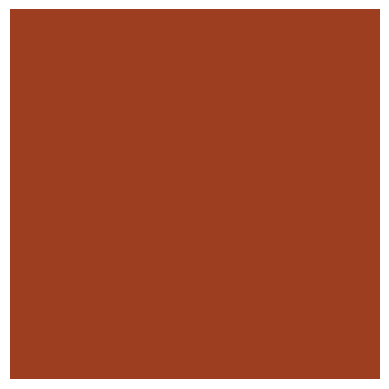

In [41]:
# Задаем цвет в формате RGB
rgb_color = [0.622, 0.247, 0.131]  # Пример значений RGB

# Создаем матрицу 1x1 с заданным цветом
color_matrix = np.array([[rgb_color]])

# Отображаем цвет
plt.imshow(color_matrix)
plt.axis('off')  # Отключаем оси координат
plt.show()

In [ ]:
df1.to_csv("/content/sample_data/project", index=False)